### MMAI 869: AI & ML Techniques
### Individual Assignment 1
#### Blair Nicolle

### Table of Contents


__Supporting Code:__

1. Exploratory Data Analysis
    - Load data from csv to dataframe
    - Basic  (Min/max/mean, histograms, look for missing data)
    - Visual (Pairplot, Correlation Heatmap)    

2. Normalization of Data
    - A data preparation step before KMeans clustering that is explained further below (search for 'isotropic')
    
3. K-means
    - 3.0  Elbow Test to determine Best Values of K to analyze
    - 3.1. K=3 Clusters (Spending Score vs Age)
    - 3.2. K=4 Clusters (Spending Score vs Age)
    - 3.3. K=5 Clusters (Spending Score vs Age)


__Assignment Question # 1:__

4. Answers to Assignment Questions

Below the code, at bottom.  Note: There are analyses along the way, usually under 
graphic illustrations.  They are summarized in section 4.


In [63]:
import pandas as pd
df_full =  pd.read_csv("./jewelry_customers.csv", encoding='latin-1')

#shortform name:
df = df_full

In [64]:
# Pandas output options (mostly for Spyder IDE Ipython console)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

# Show all lines of output and not just the output of the last statement in the iPython console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#for Jupyter
%matplotlib inline  


### 1. Exploratory Data Analysis (EDA)

In [65]:
### Initial EDA ###

#Get column names
df.columns

#datatypes of columns
#df.dtypes

# for simplicity of using L2 metric for clustering, change datatypes all to float
df["Age"] = df["Age"].astype(float)
df["Income"] = df["Income"].astype(float)

#datatypes of columns
df.dtypes

#Check for NaN's
df[pd.isnull(df).any(axis=1)]  #no NaN's

# Visually inspect first few rows
df.iloc[0:3,]

# Peruse the basic properties of each column
df['Age'].agg(['min', 'max', 'mean' ])
print()
df['Income'].agg(['min', 'max', 'mean' ])
print()
df['SpendingScore'].agg(['min', 'max', 'mean' ])
print()
df['Savings'].agg(['min', 'max', 'mean' ])
print()



Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

Age              float64
Income           float64
SpendingScore    float64
Savings          float64
dtype: object

,Age,Income,SpendingScore,Savings


,Age,Income,SpendingScore,Savings
0,58.0,77769.0,0.791329,6559.829923
1,59.0,81799.0,0.791082,5417.661426
2,62.0,74751.0,0.702657,9258.992965


min     17.000000
max     97.000000
mean    59.019802
Name: Age, dtype: float64

min      12000.000000
max     142000.000000
mean     75513.291089
Name: Income, dtype: float64

min     0.000000
max     1.000000
mean    0.505083
Name: SpendingScore, dtype: float64

min         0.000000
max     20000.000000
mean    11862.455867
Name: Savings, dtype: float64

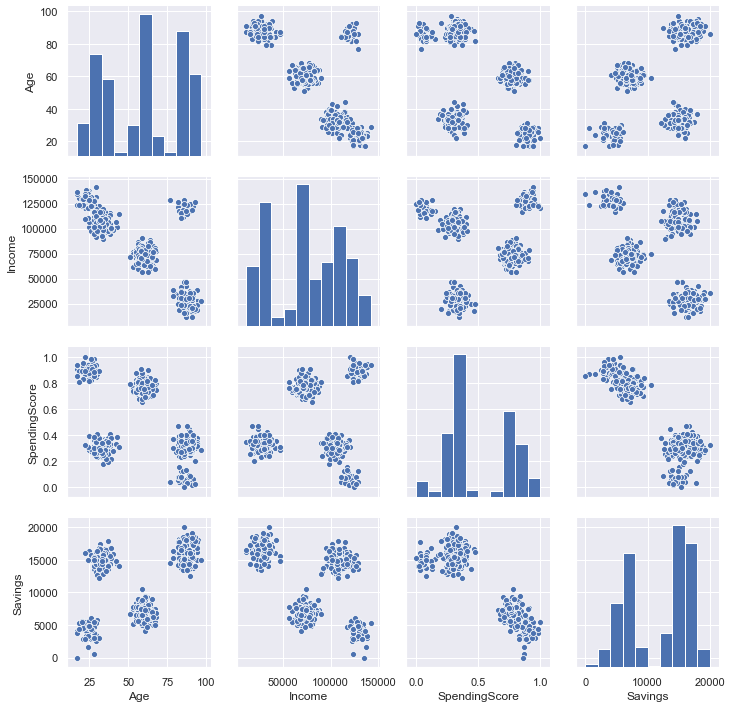

In [66]:
### Visual EDA ####

#Do pairwise plots of all features using seaborn (sns)
sns.pairplot(df)


ANALYSIS: Above, there are arguably about four or five very well-defined clusters among the pair-wise comparisons between features.  This will be compared with the results in the Elbow plot, further below.

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Income'),
 Text(2.5, 0, 'SpendingScore'),
 Text(3.5, 0, 'Savings')]

(4.01, -0.01)

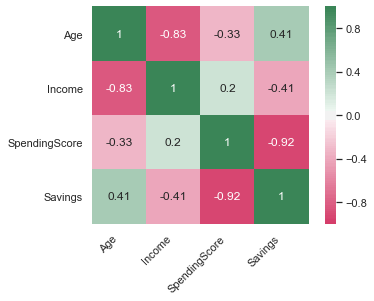

In [67]:
### Visual EDA ###

# additional imports
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot stlying.

#show correlation matrix as heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 500, n=100),
    annot = True,
    square=True
)

##cmap=sns.diverging_palette(20, 220, n=200),
    
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
        
ax.set_ylim(len(df.columns)+0.01, -0.01)  #to get around a display bug in seaborn.


ANALYSIS: Above, the highly-negatively-correlated variables provide an opportunity to reduce features (consider that if they were perfectly negatively correlated then describing one would allow you to determine the qualities of the other and thus either could be used arbitrarily in defining a customer in a cluster).  However, for now, all features will remain in the cluster analysis.  I actually did a PCA analysis but oddly I didnt get a great, clear result (nor easily interpretable result) so, again, I left all features in and stuck with the K-Means clustering analysis.

### 2. Normalization of Data


Kmeans' distance metric, L2, is by nature circular and not elliptical so it is susceptible to bias if one feature has more variation than another feature. Thus, Normalization is used to reduce this bias.



In [68]:
from sklearn.preprocessing import StandardScaler  # (z-u)/s

#scale
#mms = MinMaxScaler()
mms = StandardScaler()
mms.fit(df)
df_normalized = pd.DataFrame(mms.transform(df))
df_normalized.columns=df.columns.values + '_normalized'



StandardScaler(copy=True, with_mean=True, with_std=True)

### 3. K-Means Clustering

### 3.0. Elbow Method to determine number of clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS (aka Inertia)')

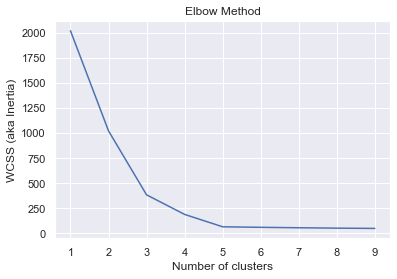

In [69]:

### ELBOW METHOD to determine number of clusters ###

from sklearn.cluster import KMeans
#import numpy as np

#nbr_clusters = 3   #this is a hyperparameter (see incrementor in loop below)
nbr_iterations=300  #this is a hyperparameter

# Elbow method is used to see change in  inertia (aka wcss or 'within cluster sum of squares') is 
# the lowest to help determine the right amount of clusters

wcss = []  #within cluster sum of squares for K=k clusters
for i in range(1, 10):   #i = nbr of clusters, another hyperparameter
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (aka Inertia)')
plt.show()



ANALYSIS: Above, the number of clusters is arguably between 3 or 5 inclusive.  Let's call it five, since five is still an acceptably small number of clusters for a store clerk to have to remember.  For thoroughness, I will do the K-means clustering with k=3, k=4, and k=5 for comparison purposes.

### 3.1. K=3 Clusters

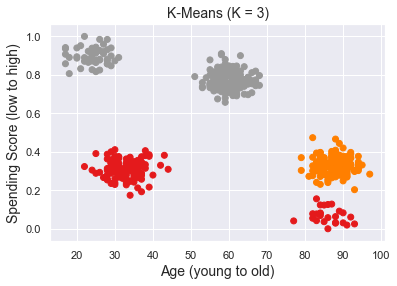

In [70]:
#from sklearn.cluster import KMeans

cluster = 3

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(df_normalized)

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);


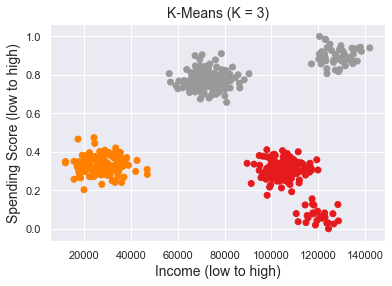

In [71]:
#from sklearn.cluster import KMeans

#cluster = 3

# Draw a fresh graph (using same K=3 clusters) showing SpendingScore vs Income

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,1], 
            df.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Income (low to high)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);


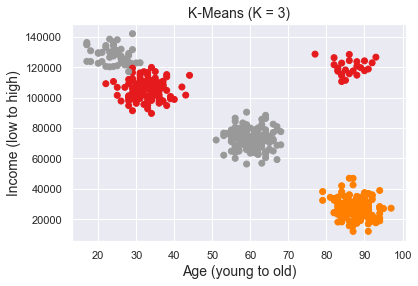

In [72]:
#from sklearn.cluster import KMeans

# Finally, draw a fresh graph (using SAME K=3 clusters) to show Income vs Age (two axes) and the Clusters (colored)

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);


ANALYSIS: From the three graphs above we see that from the first two (SpendingScore vs Age and SpendingScore vs Income) that the 'grey cluster' is the highest spending cluster - that is, the TARGET cluster - with the other two clusters ('red' and 'brown' being lower spenders).  

The Grey Cluster / TARGET cluster are formed by two groups: young people with the highest incomes (120K and above) and middle aged people (who all have same income anyway)

The two non-target clusters are old people (regardless of income) and young people with slightly lower, more standard incomes (90K-120K)


### 3.2. K=4 Clusters

The K=4 and K=5 clusters below are shown as proof that the clusters were investigated further for more granularity.

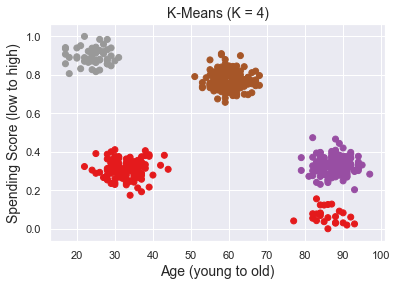

In [73]:
#from sklearn.cluster import KMeans

cluster = 4

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(df_normalized)

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);


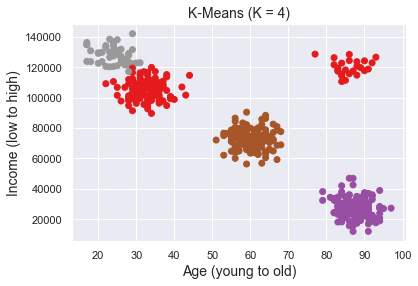

In [74]:
## Re-draw using k=4 but change the axes

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);

### 3.3. K=5 Clusters

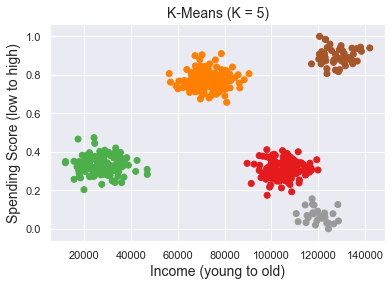

In [75]:
#from sklearn.cluster import KMeans

cluster = 5

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(df_normalized)

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,1], 
            df.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Income (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);


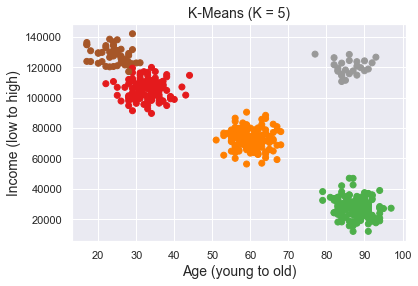

In [76]:
#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,1], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Income (low to high)', fontsize=14);

ANALYSIS: With K=4 and K=5 the business conclusions are the same about what the 'target class' of consumer is: "young and high-paid" or "middle-aged".  The additional clusters serve to break out the groups within non-target classes, but this adds no further value.  K=2 (below) isnt enough to distinguish who is highSpending and lowSpending.  Therefore, K=3 is best for describing customers.


### 3.3 K=2 ("Covering the Bases")

Since K=3 was deemed sufficient to distinguish between the two classes of 'high spending score' 
and 'low spending score' customers, I decided to go one step further and see if K=2 was sufficient
to distinguish between those two classes.  As it turns out, K=2 was not sufficient.  Thus, K=3 is
right number of clusters from this business perspective.


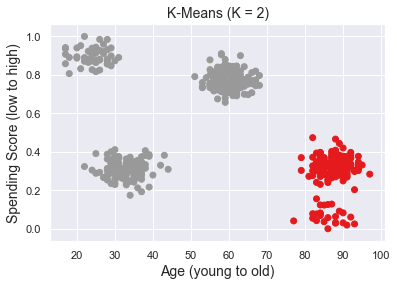

In [77]:
#from sklearn.cluster import KMeans

cluster = 2

kmeans_model = KMeans(n_clusters=cluster, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)

pred_y = kmeans_model.fit_predict(df_normalized)

#graph using the original data for ease of interpretation of axes
plt.scatter(df.iloc[:,0], 
            df.iloc[:,2], c=kmeans_model.labels_ ,             
            cmap="Set1")

plt.title("K-Means (K = " + str(cluster) + ")" , fontsize=14);
plt.xlabel('Age (young to old)', fontsize=14);
plt.ylabel('Spending Score (low to high)', fontsize=14);


### 4.  Answering The Questions

A1. Download Dataset.
- done

A2. Performing a clustering analysis
- done, above.

A2.1. Try different hyperparameters (K-Means)
- Primary hyperparameter to tune is the number of clusters (k).
- Also tried toying with max_iter but settled on max_iter=300.

A2.2. What do you think are the best parameters? Why?

- The elbow curve analysis (section 3.0) shows the most marked elbow at K=3 with a less pronounced elbow at K=5.  Between the two, K=3 is the most marked elbow and so, all else equal, is best one to consider.  As it turns out, with additional analysis (as below), K=3 was sufficient to delineate between high spenders and low spenders.


A3. Describe and interpret the clusters

- k=3 (Section 3.1) provided the earliest indication what the target customers were.  They fell into two subsets: (1) young and highest-paid, and (2) middle-aged.   These two groups had the highest spending scores. 

- When I looked at k=4 and k=5 (Section 3.2 - 3.3) the clusters did indeed show greater granularity in the clusters, however, I argue that this was of LIMITED business use as it was just sub-dividing the non-target (lower spending) customers into more granular clusters.  The k=5 cluster graph showing Spend vs Age appears beautiful but the red blotch .

- When I looked at k=2 clusters, there was not enough granularity to clearly distinguish between the high and low spending customers (ie grey cluster is showing both as high and low spending)


A4. How good are the results?

- The results are pretty good: it created extremely clear buckets to distinguish high paying and low paying customers.  

- One down side of the result would be that a clerk would need to look up a client's income (can't tell it easily from just looking at someone). But the middle-aged group would be easy to identify by eye and are high spenders.

